# Ajuste Polinomial: Underfitting vs. Overfitting

Este estudio ilustra los conceptos de *underfitting* y *overfitting* mediante el ajuste de modelos polinomiales a una función no lineal definida como:

$$ f(x) = x^3 + \sin(3x) $$

Esta función combina una componente polinómica cúbica con un término sinusoidal, lo cual introduce una complejidad no trivial que pone a prueba la capacidad de generalización de los modelos.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def f(x):
    """
    Función objetivo: polinomio cúbico + componente sinusoidal
    """
    return x**3 + np.sin(3 * x)


## 1. Generación de Datos

Se generan datos sintéticos dividiendo el dominio entre puntos de entrenamiento y puntos de test. Los valores reales se calculan con la función $f(x)$ y no se agrega ruido para simplificar la visualización.

---

In [2]:
# Cantidad de muestras
n_train = 10
n_test = 10

# Generamos puntos uniformes y barajamos
X_all = np.linspace(-2, 2, n_train + n_test)
np.random.shuffle(X_all)

# División en entrenamiento y prueba
x_train = np.sort(X_all[:n_train]).reshape(-1, 1)
x_test = np.sort(X_all[n_train:]).reshape(-1, 1)

y_train = f(x_train)
y_test = f(x_test)


## 2. Modelos Polinomiales

### Modelo de Grado 2 (Underfitting)

Este modelo ajusta la forma:

$$ \hat{y}(x) = a_0 + a_1x + a_2x^2 $$

El modelo no posee la complejidad suficiente para capturar la variabilidad de $f(x)$, lo cual resulta en un *underfitting*:
- Alto error tanto en entrenamiento como en test.
- Predicción demasiado simple.

### Modelo de Grado 20 (Overfitting)

Este modelo ajusta:

$$ \hat{y}(x) = a_0 + a_1x + a_2x^2 + \dots + a_{20}x^{20} $$

Tiene gran capacidad de ajuste, pero termina "siguiendo" excesivamente los puntos de entrenamiento:
- Bajo error en entrenamiento.
- Alto error en test (falla en generalizar).

---

In [3]:
# Modelo grado 2 (degree=2)
poly2 = PolynomialFeatures(degree=2)
x_train_poly2 = poly2.fit_transform(x_train)
x_test_poly2 = poly2.transform(x_test)
model2 = LinearRegression().fit(x_train_poly2, y_train)
y_pred_train2 = model2.predict(x_train_poly2)
y_pred_test2 = model2.predict(x_test_poly2)

# Modelo grado 20 (Degree=20)
poly20 = PolynomialFeatures(degree=20)
x_train_poly20 = poly20.fit_transform(x_train)
x_test_poly20 = poly20.transform(x_test)
model20 = LinearRegression().fit(x_train_poly20, y_train)
y_pred_train20 = model20.predict(x_train_poly20)
y_pred_test20 = model20.predict(x_test_poly20)


# 3. Visualización

Los gráficos comparan:
- La función original $f(x)$.
- Los datos reales de entrenamiento y test.
- Las predicciones del modelo.

Se limitó el rango vertical a $[-20, 20]$ para mayor claridad.

---


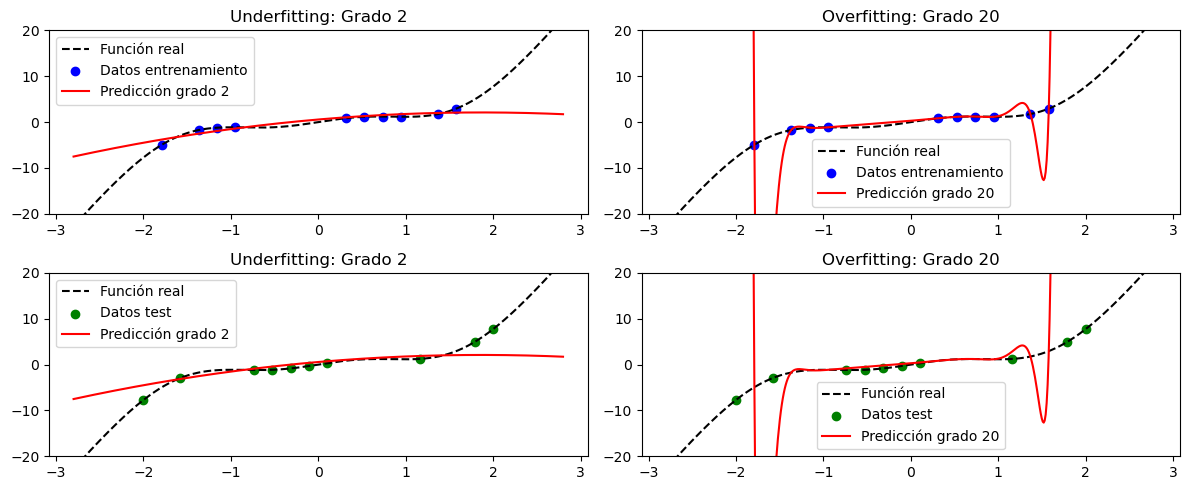

In [4]:
x_plot = np.linspace(-2.8, 2.8, 500).reshape(-1, 1)
y_true = f(x_plot.flatten())

plt.figure(figsize=(12, 5))

plt.subplot(2, 2, 1)
plt.title("Underfitting: Grado 2")
plt.plot(x_plot, f(x_plot.flatten()), '--', color='black', label='Función real')
plt.scatter(x_train, y_train, color='blue', label='Datos entrenamiento')
plt.plot(x_plot, model2.predict(poly2.transform(x_plot)), color='red', label='Predicción grado 2')
plt.ylim(-20, 20)
plt.legend()

plt.subplot(2, 2, 3)
plt.title("Underfitting: Grado 2")
plt.plot(x_plot, f(x_plot.flatten()), '--', color='black', label='Función real')
plt.scatter(x_test, y_test, color='green', label='Datos test')
plt.plot(x_plot, model2.predict(poly2.transform(x_plot)), color='red', label='Predicción grado 2')
plt.ylim(-20, 20)
plt.legend()

plt.subplot(2, 2, 2)
plt.title("Overfitting: Grado 20")
plt.plot(x_plot, f(x_plot.flatten()), '--', color='black', label='Función real')
plt.scatter(x_train, y_train, color='blue', label='Datos entrenamiento')
plt.plot(x_plot, model20.predict(poly20.transform(x_plot)), color='red', label='Predicción grado 20')
plt.ylim(-20, 20)
plt.legend()

plt.subplot(2, 2, 4)
plt.title("Overfitting: Grado 20")
plt.plot(x_plot, f(x_plot.flatten()), '--', color='black', label='Función real')
plt.scatter(x_test, y_test, color='green', label='Datos test')
plt.plot(x_plot, model20.predict(poly20.transform(x_plot)), color='red', label='Predicción grado 20')
plt.ylim(-20, 20)
plt.legend()

plt.tight_layout()
plt.show()

## 4. Métrica de Evaluación

Se utiliza el **Error Cuadrático Medio (MSE)**:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

Este error se calcula tanto para los modelos en los conjuntos de test, ayudando a evaluar qué tan bien generaliza cada uno.

---

In [5]:
print("Error cuadrático medio - Modelo grado 2:", mean_squared_error(y_test, y_pred_test2))
print("Error cuadrático medio - Modelo grado 20:", mean_squared_error(y_test, y_pred_test20))


Error cuadrático medio - Modelo grado 2: 5.257542845283782
Error cuadrático medio - Modelo grado 20: 146557852.65470272
